In [1]:
from plot import *

In [16]:
metric_v2 = get_json_data("/mnt/dataset/stardist/sdm_monuseg_v1.2_SynPlusGT//*")
metric_v3 = get_json_data("/mnt/dataset/stardist/sdm_monuseg_v1.3_Syn2GT/*")




In [17]:
def comb_dict_with_suffix(src, dst, suffix):
    src = {k+suffix: v for k, v in src.items()}
    dst.update(src)

    return dst

metrics = {}


metrics = comb_dict_with_suffix(metric_v2, metrics, '_v2')
metrics = comb_dict_with_suffix(metric_v3, metrics, '_v3')



In [18]:
print(metrics.keys())

dict_keys(['stardist_128_128_02gt_02syn.x2_inst_v2', 'stardist_128_128_02gt_02syn_inst_v2', 'stardist_128_128_02gt_02syn.x4_inst_v2', 'stardist_128_128_05gt_05syn_inst_v2', 'stardist_128_128_02gt_02syn.x3_inst_v2', 'stardist_128_128_02gt_inst_v2', 'stardist_128_128_01gt_01syn.x2_inst_v3', 'stardist_128_128_01gt_01syn.x3_inst_v3', 'stardist_128_128_01gt_01syn_inst_v3', 'stardist_128_128_05gt_05syn_inst_v3', 'stardist_128_128_05gt_inst_v3', 'stardist_128_128_01gt_inst_v3'])


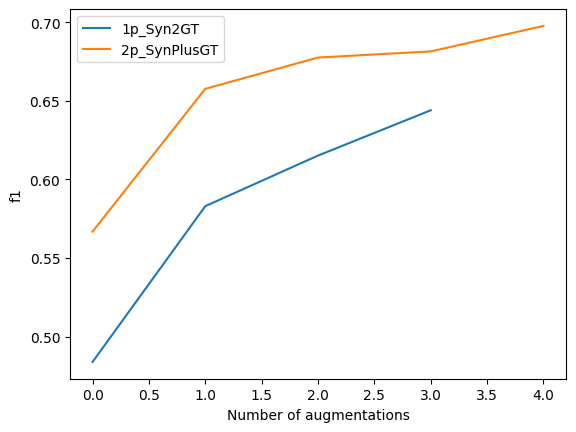

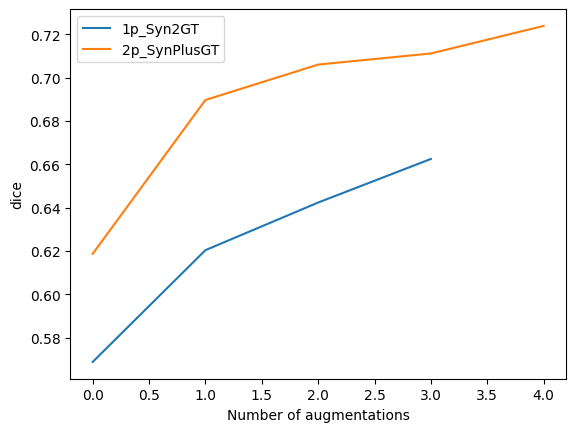

In [20]:

for m in ['f1', 'dice']:

    vals = {}
    metric = {exp : metrics[exp][m] for exp in metrics.keys()}

    vals["1p_Syn2GT"] = get_exp_vals(metric, "stardist_128_128_01gt", word="v3", ignore="filt")

    vals["2p_SynPlusGT"] = get_exp_vals(metric, "stardist_128_128_02gt", word="v2", ignore="filt")

    plt.figure()

    for k, v in vals.items():
        plt.plot(v[0], v[1], label=k)

    plt.legend()
    plt.xlabel('Number of augmentations')
    # plt.xticks(range(len(x_05)), [f'x{i}' for i in range(len(x_05))])
    plt.ylabel(m)

    plt.show()




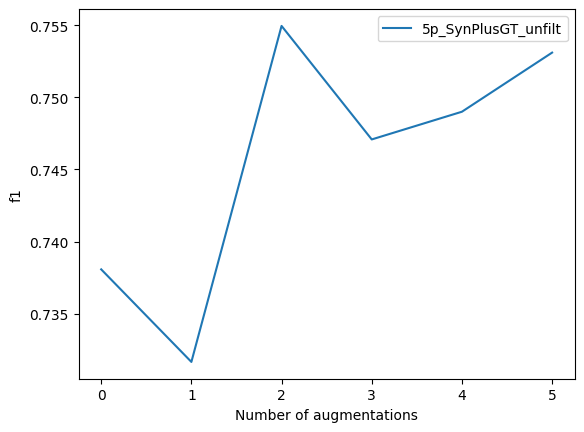

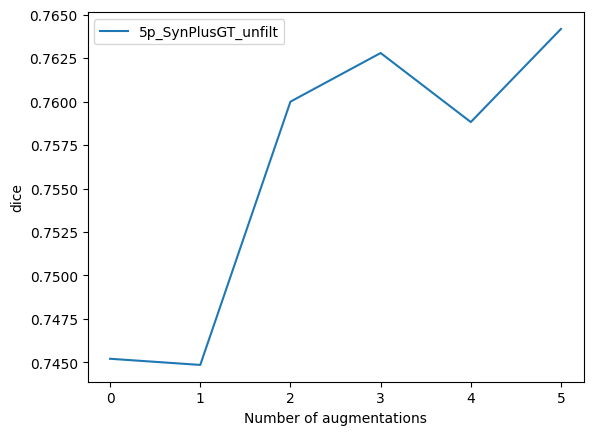

In [5]:
metric_v1 = get_json_data("/mnt/dataset/stardist/col_aug_monuseg_v1.1_SynPlusGT_unfilt/*")

metric_v1


for m in ['f1', 'dice']:

    vals = {}
    metric = {exp : metric_v1[exp][m] for exp in metric_v1.keys()}

    vals["5p_SynPlusGT_unfilt"] = get_exp_vals(metric, "stardist_128_128_05gt",  ignore="filt")


    plt.figure()

    for k, v in vals.items():
        plt.plot(v[0], v[1], label=k)

    plt.legend()
    plt.xlabel('Number of augmentations')
    # plt.xticks(range(len(x_05)), [f'x{i}' for i in range(len(x_05))])
    plt.ylabel(m)

    plt.show()




In [ ]:

# plot_metrics(metric_v0, names=['f1', 'dice'])

# f1_v1 = get_json_data("/mnt/dataset/stardist/models_monuseg_v1.1/*")
# f1_v1 = {k+'_v1': v for k, v in f1_v1.items()}

# f1.update(f1_v1)    

plot_metrics(metric, names=['f1', 'dice'])

plot_samples(metric_v0, out_name='plot_sample.png')

